**ASSIGNMENT 2**


 DATASET EXPLANATION:
 Uploading the Bank Management Data set, The Dataset can be described as below.

Input variables:

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

So there are total 21 columns and 41188 rows(data entries) in the choosen dataset.

In [126]:
!pip install h2o
%matplotlib inline
import random, os, sys
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
import seaborn as sns
url = 'https://raw.githubusercontent.com/Pramita0410/AutoML_bank/main/bank-additional-full.csv'

corr_data = pd.read_csv(url, sep=';')
data2 = pd.read_csv(url, sep=';')

In [3]:
corr_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


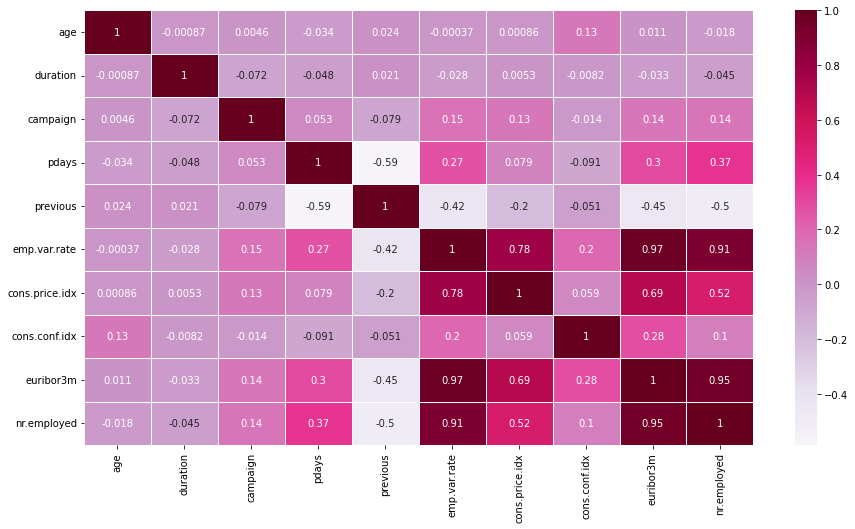

In [4]:
import matplotlib.pyplot as plt
# Create a figure with a specified size
fig, ay = plt.subplots(figsize=(15, 8))

# Generate the heatmap
sns.heatmap(corr_data.corr(), linewidths=0.9, annot=True, ax=ay, cmap='PuRd')

# Show the plot
plt.show()

The correlation heatmap shows that there is very little to no correlation between the independent variables. This suggests that each variable is independent of the others. The closer the values are to 1 and -1, the stronger the positive or negative correlation between two features.





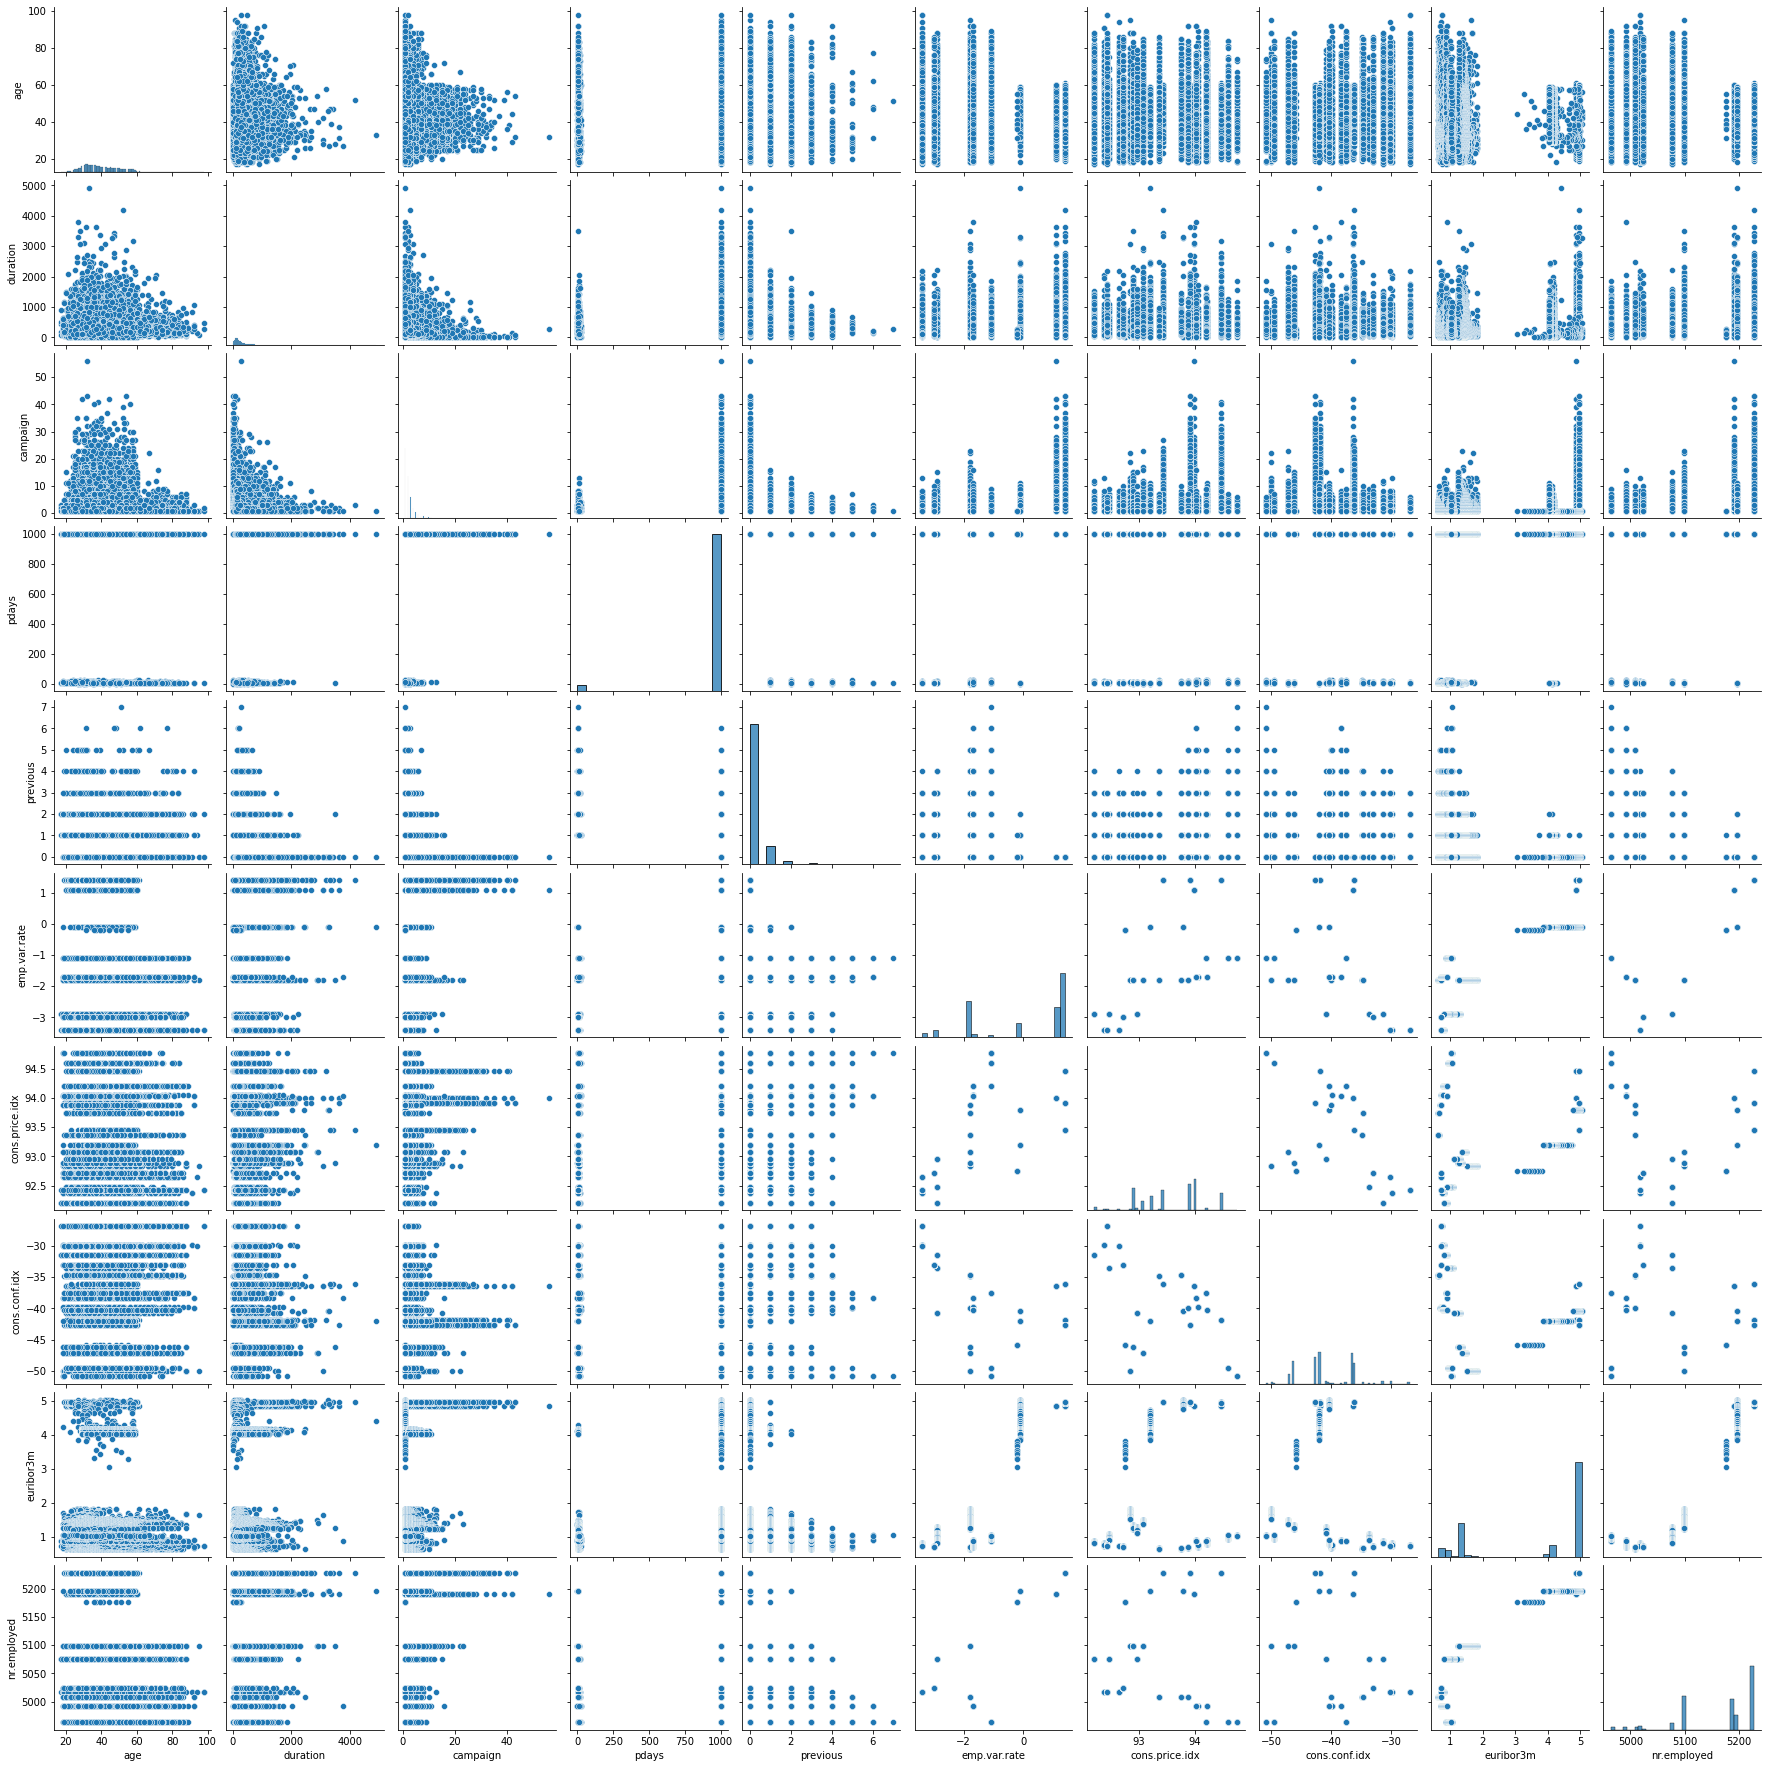

In [5]:
sns.pairplot(
    corr_data
)  

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

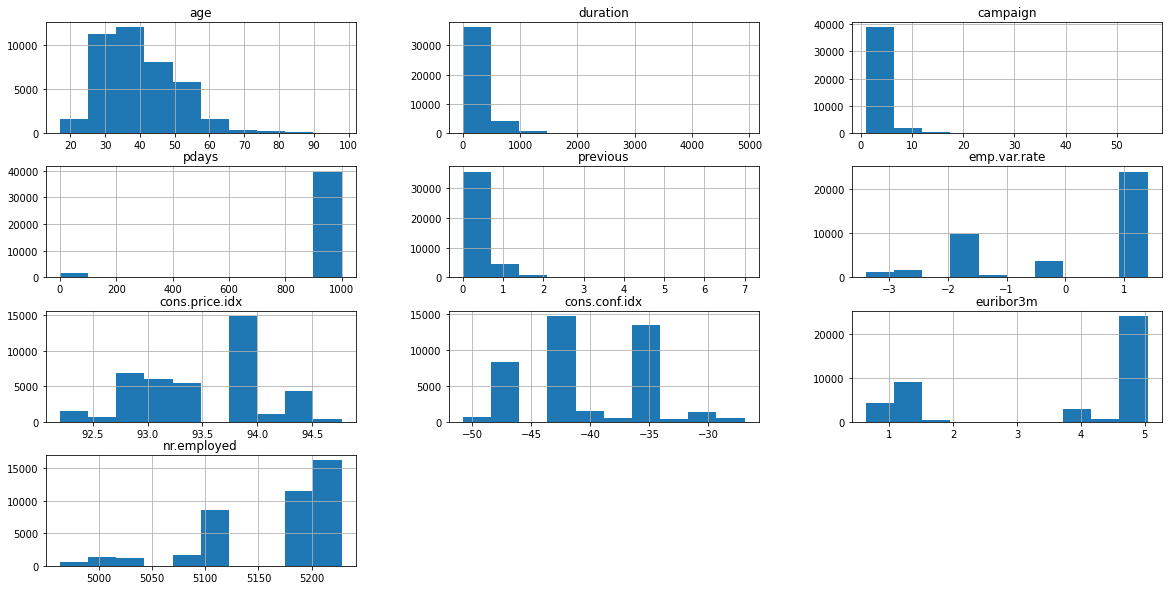

In [6]:
corr_data.hist( figsize=(20, 10))


From the above, we can say that we have a column age, the histogram plot shows how frequently each age occurs in the dataset. The x-axis shows the range of ages, and the y-axis shows the frequency of each age in the dataset.

In [120]:

# importing H20 automl 
#H2O AutoML provides necessary data processing capabilities.
#So there is no need to create duplicates and can take care of missing value imputation and other data cleaning activities.
import h2o
from h2o.automl import H2OAutoML
import os


In [121]:
h2o.init(strict_version_check=False)
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 hours 51 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_ic1kat
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [122]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
#min_mem_size specifies the minimum memory (in gigabytes) that should be allocated to the H2O cluster.


run_time = 222

# run_time specifies the maximum runtime (in seconds) for the AutoML algorithm to search for the best model.
# This parameter helps to limit the time the algorithm spends searching for the best model, as it can be time-consuming and resource-intensive.

In [123]:
from distutils.util import strtobool
import psutil
pct_memory = 0.5 
#This line sets the percentage of available memory to use for the H2O cluster to 50% (0.5).
virtual_memory = psutil.virtual_memory()
#The above line gets information about the available system memory using the psutil.virtual_memory() function, and stores it in the virtual_memory variable.
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

# finally dividing the available memory by the number of gigabytes in a byte (1073741824) and rounding to the nearest integer.
print(min_mem_size)

0


In [124]:
import random, os, sys
import logging


port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)
# in try: we are intializing H2O cluster
  #in except: If the H2O cluster initialization fails 
  # (for example, if the specified port is already in use), the code logs a critical error using the logging.critical() function,
  #  downloads all logs using h2o.download_all_logs() function and then shuts down the H2O cluster using h2o.cluster().shutdown().
  #  Finally, the code exits with a status code of 2 using the sys.exit(2) function.

Checking whether there is an H2O instance running at http://localhost:14348..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvkcmna8c
  JVM stdout: /tmp/tmpvkcmna8c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvkcmna8c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:14348
Connecting to H2O server at http://127.0.0.1:14348 ... successful.


H2O_cluster_uptime:,18 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_znxlt7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [125]:
data = h2o.import_file('https://raw.githubusercontent.com/Pramita0410/AutoML_bank/main/bank-additional-full.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [13]:
data.head()

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [14]:
missing_values = data.isna().sum()
print(missing_values)


0.0


In [15]:
data.types


{'age': 'int',
 'job': 'enum',
 'marital': 'enum',
 'education': 'enum',
 'default': 'enum',
 'housing': 'enum',
 'loan': 'enum',
 'contact': 'enum',
 'month': 'enum',
 'day_of_week': 'enum',
 'duration': 'int',
 'campaign': 'int',
 'pdays': 'int',
 'previous': 'int',
 'poutcome': 'enum',
 'emp.var.rate': 'real',
 'cons.price.idx': 'real',
 'cons.conf.idx': 'real',
 'euribor3m': 'real',
 'nr.employed': 'real',
 'y': 'enum'}

In [16]:
data.shape


(41188, 21)

In [17]:
data.describe(chunk_summary=True)
# The "chunk_summary=True" parameter tells H2O.ai to display a summary of each chunk of data, as well as a summary of the entire dataset.





Rows:41188
Cols:21

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C0L           Constant long              17       10.119              1.3 KB    0.178148
C0D           Constant double            11       6.54762             880  B    0.115272
CBS           Binary                     9        5.35714             6.3 KB    0.842666
CXI           Sparse Integers            13       7.7381              9.5 KB    1.27271
C1N           1-Byte Integers (w/o NAs)  78       46.4286             397.5 KB  53.3133
C1S           1-Byte Fractions           15       8.92857             76.6 KB   10.2744
C2            2-Byte Integers            12       7.14286             121.6 KB  16.3118
C2S           2-Byte Fractions           13       7.7381              131.9 KB  17.6917

Frame distribution summary: 
                size      number_of_rows    number_of_chunks_per_column    number_of_chunks
--------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:5934  745.5 KB  41188             8                              168
mean            745.5 KB  41188             8                              168
min             745.5 KB  41188             8                              168
max             745.5 KB  41188             8                              168
stddev          0  B      0                 0                              0
total           745.5 KB  41188             8                              168

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,enum,real,real,real,real,real,enum
mins,17.0,,,,,,,,,,0.0,1.0,0.0,0.0,,-3.4,92.201,-50.8,0.634,4963.6,
mean,40.02406040594343,,,,,,,,,,258.2850101971447,2.567592502670679,962.4754540157328,0.17296299893172798,,0.0818855006312521,93.5756643682626,-40.50260027192387,3.6212908128581076,5167.035910944939,
maxs,98.0,,,,,,,,,,4918.0,56.0,999.0,7.0,,1.4,94.767,-26.9,5.045,5228.1,
sigma,10.421249980934054,,,,,,,,,,259.2792488364648,2.77001354290233,186.9109073447419,0.4949010798392899,,1.5709597405170257,0.5788400489540979,4.6281978561745465,1.7344474048512613,72.2515276682598,
zeros,0,,,,,,,,,,4,0,15,35563,,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no




1.   **Frame distribution summary** section provides information about the distribution of the data across the available nodes in the H2O cluster.

2.   **Column type frequency summary** section shows the frequency of each column type in the dataset, which can be helpful for understanding the data types and formats of the columns in the dataset.



In [128]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

In [129]:
#Display all columns in X
X=data.columns
print(X)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [130]:
#Seperate Dependent variable from Independent variable
y_numeric ='y'
X.remove(y_numeric) 
print(X)


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**TRAINING AUTOML MODELS**

In [131]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X, y=y_numeric, training_frame=data_train)  # Trainig the dataset on different models

AutoML progress: |████████████████████████████

In [ ]:

#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .
lb = aml.leaderboard

In [ ]:
lb.head()


In [25]:
all_predictions = aml.leader.predict(data_test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [26]:
all_predictions.head(15)


predict,no,yes
no,0.997354,0.00264597
no,0.996853,0.00314694
no,0.995572,0.00442794
no,0.997855,0.00214528
no,0.995047,0.00495268
yes,0.349033,0.650967
no,0.996602,0.0033977
no,0.997258,0.00274229
no,0.997249,0.0027509
no,0.996547,0.0034529


In [27]:
leaderboard = print(
    aml.leaderboard
) 


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_1_20230228_223106     0.94832    0.175523  0.656613                0.149661  0.236865  0.0561052
StackedEnsemble_BestOfFamily_2_AutoML_1_20230228_223106  0.947937   0.175688  0.654562                0.150058  0.237233  0.0562796
StackedEnsemble_BestOfFamily_1_AutoML_1_20230228_223106  0.947881   0.175757  0.654244                0.142129  0.2373    0.0563112
GBM_1_AutoML_1_20230228_223106                           0.947432   0.176116  0.654102                0.159281  0.237448  0.0563814
GBM_2_AutoML_1_20230228_223106                           0.945      0.186226  0.650909                0.154698  0.239197  0.0572153
GBM_4_AutoML_1_20230228_223106                           0.944987   0.18937   0.640887                0.146121  0.241455  0.0583005
XGBoost_1_AutoML_1_20230228_223106                       0.944196   0.184626

In [28]:
print(aml.leader)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230228_223106


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  7/8
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  2/2
# GLM base models (used / total)      1/1
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.04109704347765246
RMSE: 0.20272405747136293
LogLoss: 0.13381619170404674
AUC: 0.973689406490478
AUCPR: 0.825098037368387
Gini: 0.9473788129809559
Null degrees of freedom: 10089
Residual degrees of f

In [29]:
best_model = aml.leader
best_model.model_performance(data_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05493902366120039
RMSE: 0.234390749948031
LogLoss: 0.17041957838999625
AUC: 0.9509481237525356
AUCPR: 0.6675675715298965
Gini: 0.9018962475050711
Null degrees of freedom: 8336
Residual degrees of freedom: 8329
Null deviance: 5835.934999787714
Residual deviance: 2841.5760500747974
AIC: 2857.5760500747974

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3201637938309523
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6863  543    0.0733   (543.0/7406.0)
yes    203   728    0.218    (203.0/931.0)
Total  7066  1271   0.0895   (746.0/8337.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.320164     0.661217  219
max f2                       0.171472     0.774894  280
max f0point5                 0.472417     0.631974  159
max accuracy                 0.472417     0.917716  159
max precision                0.951288     1         0
max recall                   0.00753785   1         382
max specificity              0.951288     1         0
max absolute_mcc             0.252443     0.622561  246
max min_per_class_accuracy   0.187435     0.888604  272
max mean_per_class_accuracy  0.113255     0.89842   306
max tns                      0.951288     7406      0
max fns                      0.951288     930       0
max fps                      0.00140516   7406      399
max tps                      0.00753785   931       382
max tnr                      0.951288     1         0
max fnr                      0.951288     0.998926  0
max fpr                      0.00140516   1         399
max tpr                      0.00753785   1         382

Gains/Lift Table: Avg response rate: 11.17 %, avg score: 11.38 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100756                   0.855365           7.67562    7.67562            0.857143         0.890827    0.857143                    0.890827            0.0773362       0.0773362                  667.562   667.562            0.0757159
2        0.0200312                   0.788392           7.44442    7.56071            0.831325         0.820055    0.844311                    0.855653            0.0741139       0.15145                    644.442   656.071            0.147939
3        0.0301068                   0.739055           6.60956    7.2424             0.738095         0.760234    0.808765                    0.82372             0.0665951       0.218045                   560.956   624.24             0.211564
4        0.0400624                   0.684              6.14974    6.97087            0.686747         0.709188    0.778443                    0.795258            0.0612245       0.27927                    514.974   597.087            0.269278
5        0.050018                    0.645526           5.07084    6.59269            0.566265         0.66207     0.736211                    0.768749            0.0504834       0.329753                   407.084   559.269            0.3149
6        0.100036                    0.482595           4.93915    5.76592            0.551559         0.564347    0.643885                    0.666548            0.247046        0.576799                   393.915   476.592            0.536697
7        0.150054                    0.326056           3.88689    5.13958            0.434053         0.404293    0.5739

In [30]:
# Getting the name of the best model
best_model_name = best_model.model_id

# Print the name of the best model
print("The best model is:", best_model_name)


The best model is: StackedEnsemble_AllModels_1_AutoML_1_20230228_223106


**Explanation**: The top three models on the leaderboard differ in their approach to making predictions. The first two models are ensemble models, which combine multiple models, while the third model is a GBM which is a Gradient Boosting Method.

 Ensembles, particularly stacked ensembles, tend to perform better than single models as they use a combination of models to make predictions.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

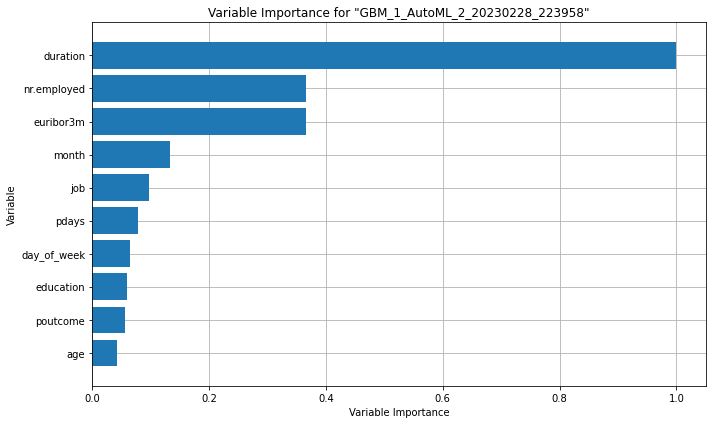

In [119]:
best_mod = aml.explain(frame = data_test, figsize = (10,6),include_explanations=['varimp'])
#referred this line of code to find the variable importance from the notebook provided


The above graph shows the variable importance of the top third best model because the first (i.e., stackedensemble) does not have a variable importance plot.

In [32]:
%matplotlib inline
best_model.varimp()

**As, stacked ensemble models do not have a variable importance plot. I will be tring to visualize the variable importance of the base models that are used to create the stacked ensemble in the next step. We will access the base models of the stacked ensemble using the base_models attribute.**

In [33]:
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator, H2OStackedEnsembleEstimator

# Define base models with cross-validation
model1 = H2OGradientBoostingEstimator(nfolds=5, seed=123, keep_cross_validation_predictions=True)
model2 = H2ORandomForestEstimator(nfolds=5, seed=123, keep_cross_validation_predictions=True)

# Train base models on training data
model1.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)
model2.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)

# Train stacked ensemble model
ensemble = H2OStackedEnsembleEstimator(base_models=[model1, model2], seed=123)
ensemble.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)

# Evaluate ensemble model performance on test data
ensemble_perf = ensemble.model_performance(data_test)
print(ensemble_perf)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
stackedensemble Model Build progress: |██████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05860672411491158
RMSE: 0.24208825687114932
LogLoss: 0.19328729693846214
AUC: 0.9490168652989288
AUCPR: 0.6646256215075246
Gini: 0.8980337305978576
Null degrees of freedom: 8336
Residual degrees of freedom: 8334
Null deviance: 5835.934999787714
Residual deviance: 3222.8723891519176
AIC: 3228.8723891519176

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11116111221001176
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6683  723    0.0976   (723.0/7406.0)
yes    132   799    0.1418   (132.0/931.0)
Total  6815  1522   0.1026   (855.0/8337.0)

Maximum Metrics: Maximum metrics at their resp

**From the above, we concluded that we cannot plot graph for the best model. Hence, we are using the best model's base models and then plotting a graph to visualize the variable importance**

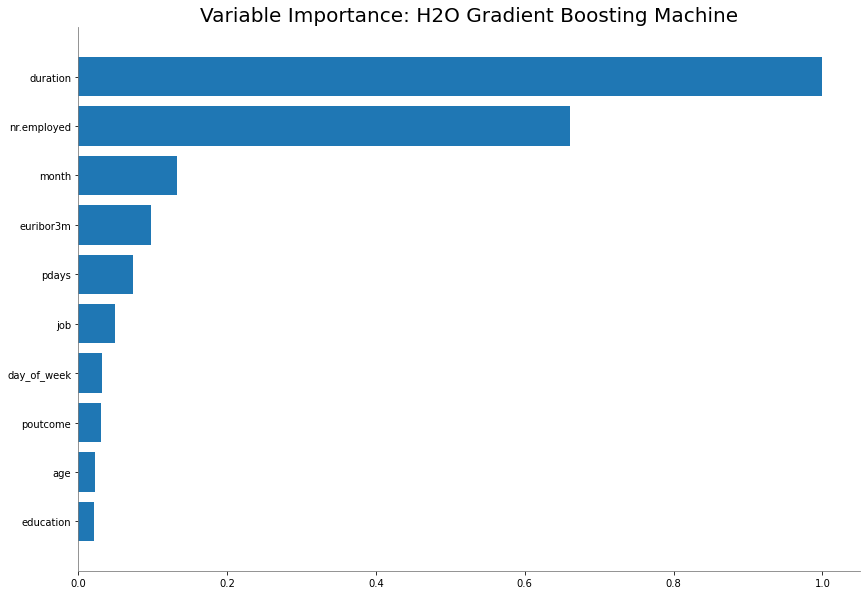

<Figure size 432x288 with 0 Axes>

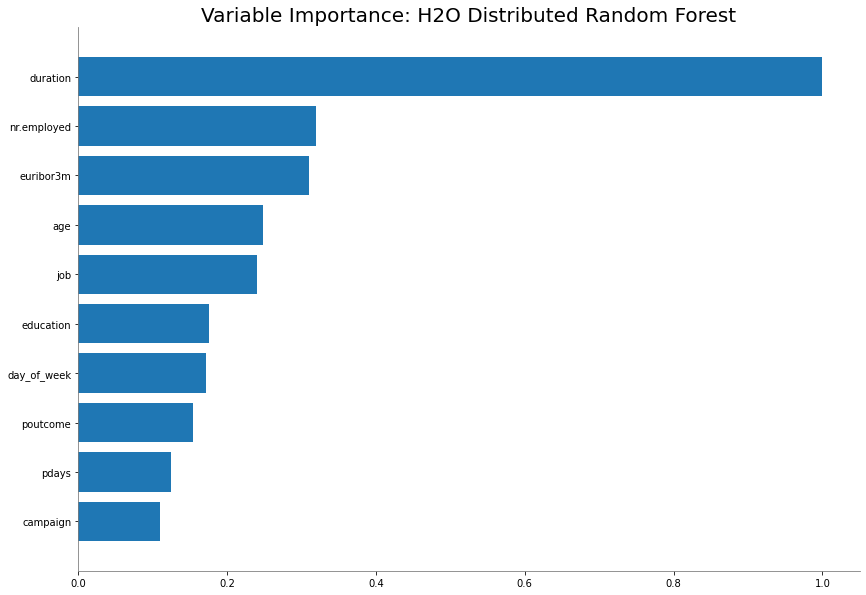

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

# Plot variable importances for model1
model1_varimp = model1.varimp()
model1_varimp_plot = model1.varimp_plot()
plt.show(model1_varimp_plot)

# Plot variable importances for model2
model2_varimp = model2.varimp()
model2_varimp_plot = model2.varimp_plot()
plt.show(model2_varimp_plot)


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20230228_223106,0.950948,0.17042,0.667568,0.145682,0.234391,0.054939,5344,0.074935,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230228_223106,0.950875,0.170201,0.667448,0.141128,0.234397,0.0549418,3841,0.094232,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230228_223106,0.950754,0.170412,0.666995,0.141932,0.234579,0.0550274,4045,0.117543,StackedEnsemble
XGBoost_1_AutoML_1_20230228_223106,0.949896,0.173687,0.653006,0.139265,0.237367,0.0563432,10231,0.016771,XGBoost
GBM_1_AutoML_1_20230228_223106,0.949321,0.172186,0.662241,0.151857,0.235902,0.0556496,7562,0.071409,GBM
GBM_4_AutoML_1_20230228_223106,0.947563,0.185401,0.644762,0.125869,0.239236,0.0572338,2024,0.015177,GBM
GBM_2_AutoML_1_20230228_223106,0.947085,0.184209,0.650802,0.140676,0.238464,0.0568651,1462,0.012714,GBM
XGBoost_2_AutoML_1_20230228_223106,0.947021,0.181209,0.644404,0.129438,0.239415,0.0573195,1876,0.006614,XGBoost
GBM_3_AutoML_1_20230228_223106,0.946602,0.185221,0.645062,0.126949,0.239757,0.0574833,1639,0.014374,GBM
GBM_5_AutoML_1_20230228_223106,0.93701,0.270185,0.629137,0.151163,0.280004,0.0784024,182,0.003706,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20230228_223106

,no,yes,Error,Rate
no,6863.0,543.0,0.0733,(543.0/7406.0)
yes,203.0,728.0,0.218,(203.0/931.0)
Total,7066.0,1271.0,0.0895,(746.0/8337.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

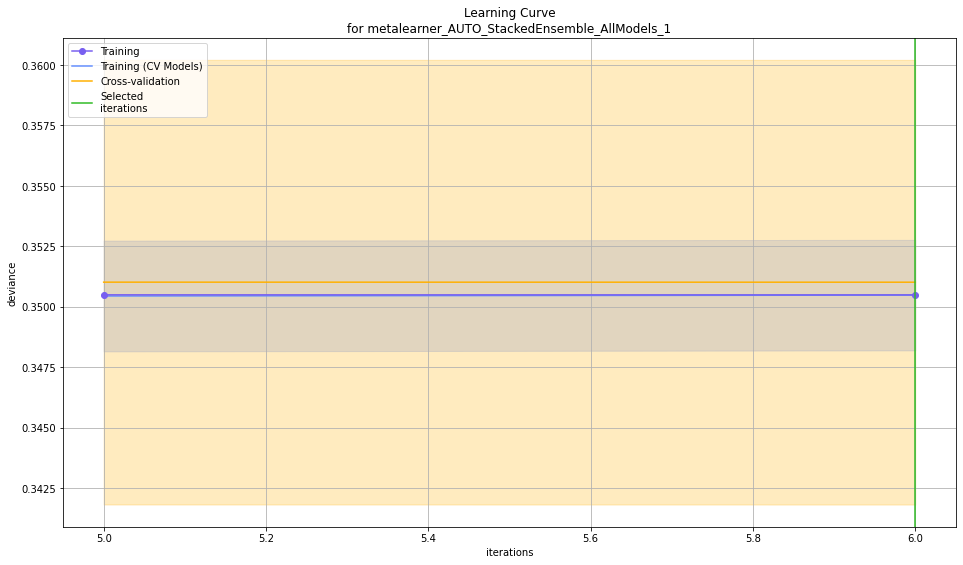

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

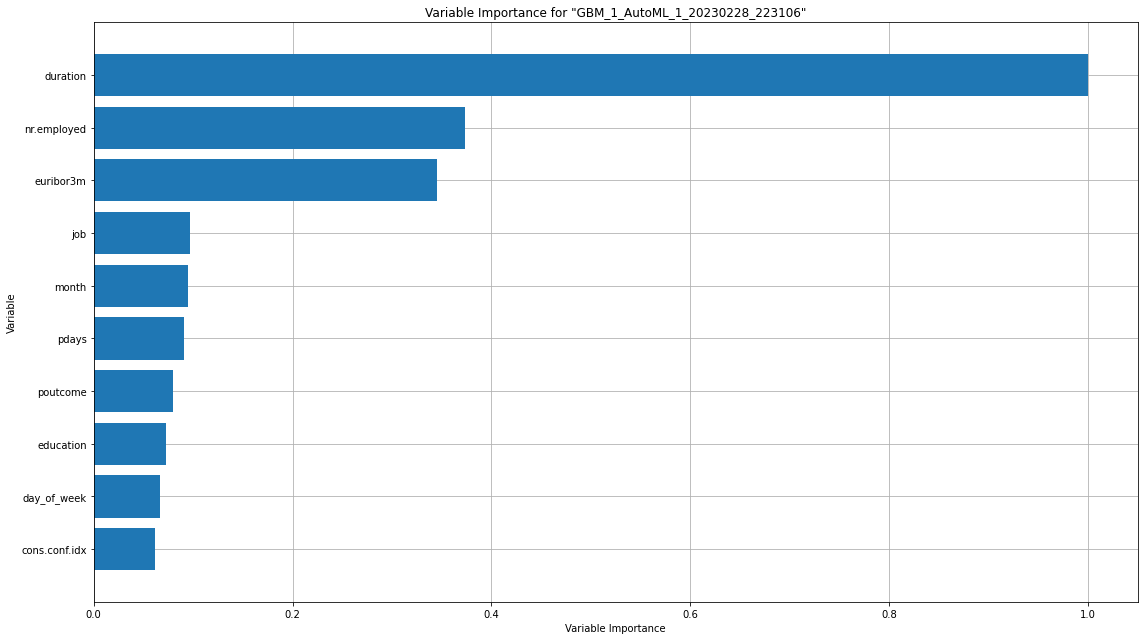

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

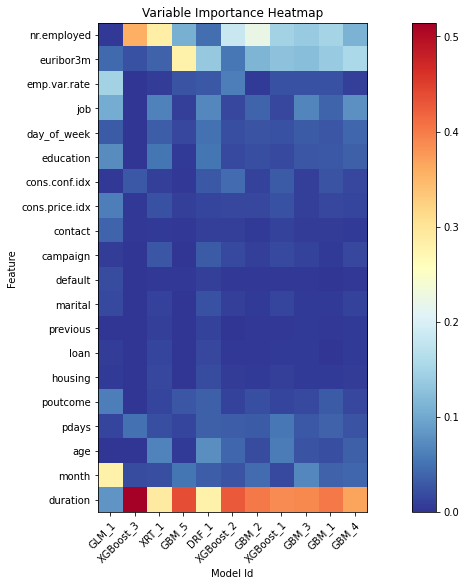

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

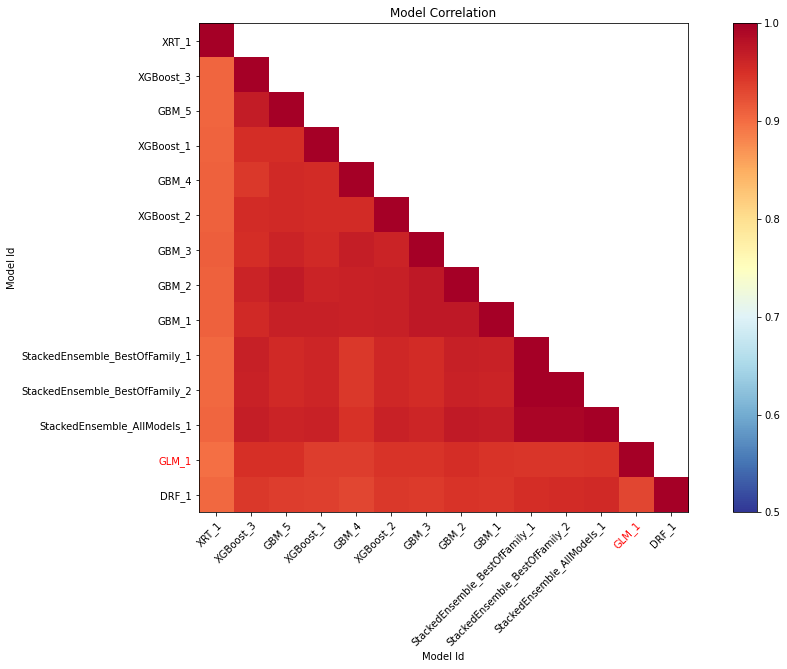

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

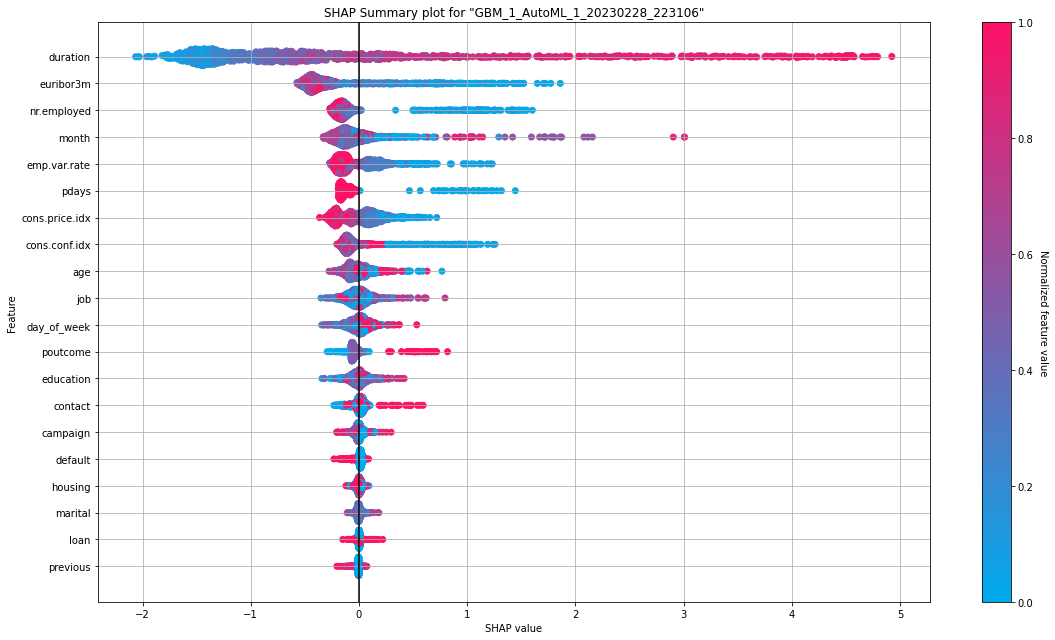

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

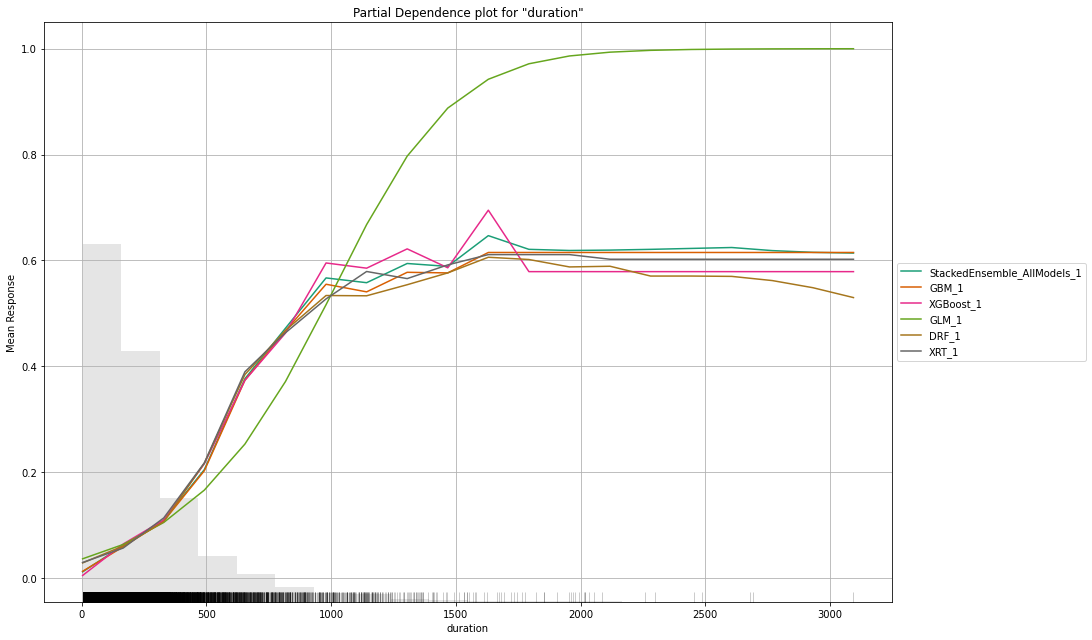

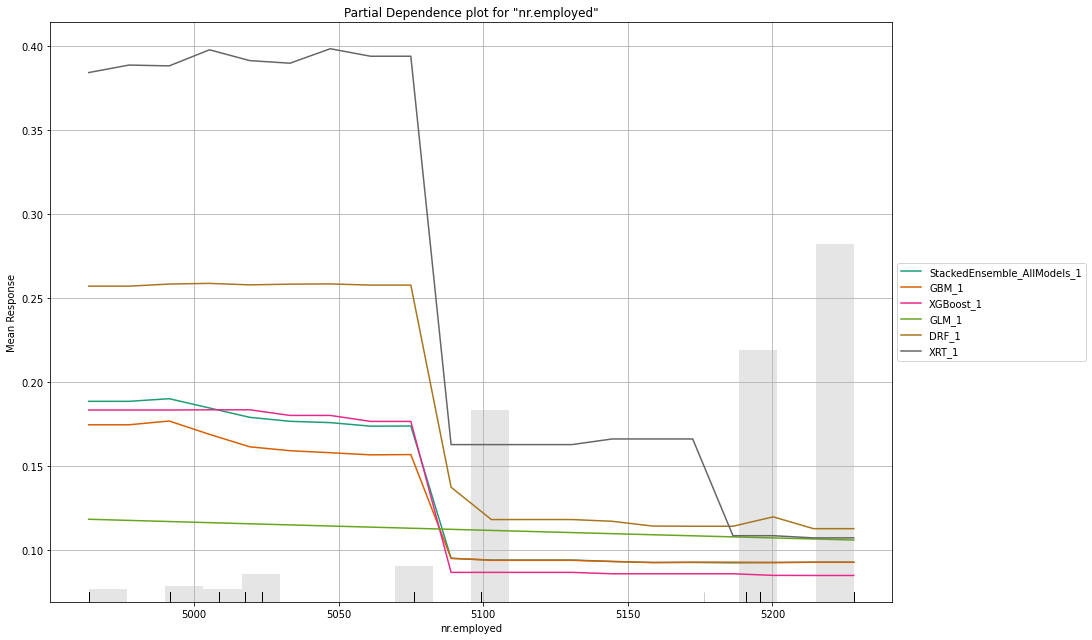

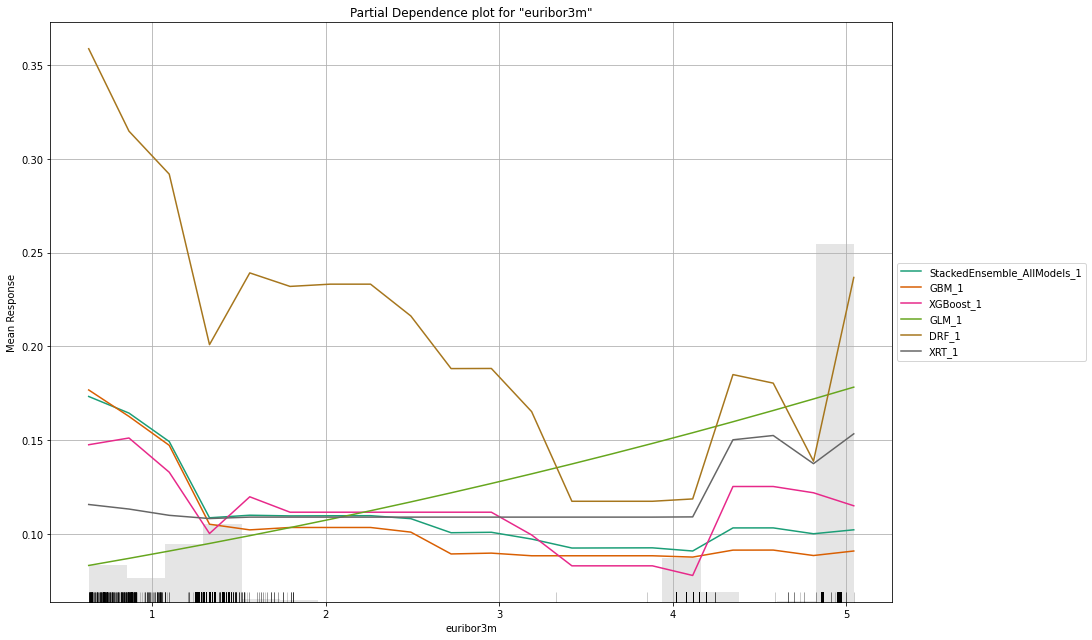

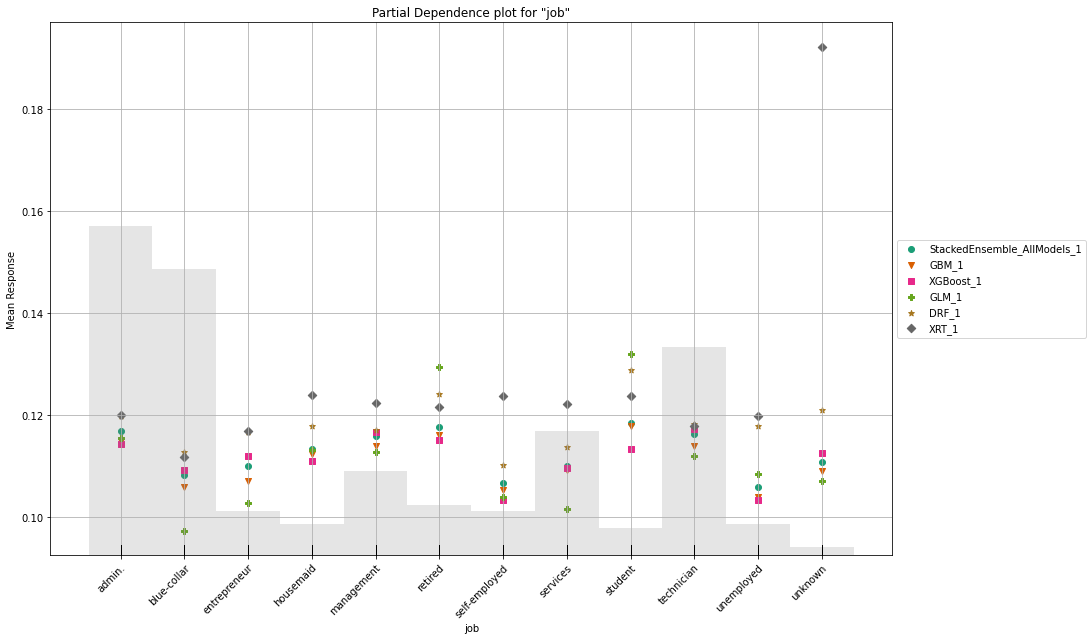

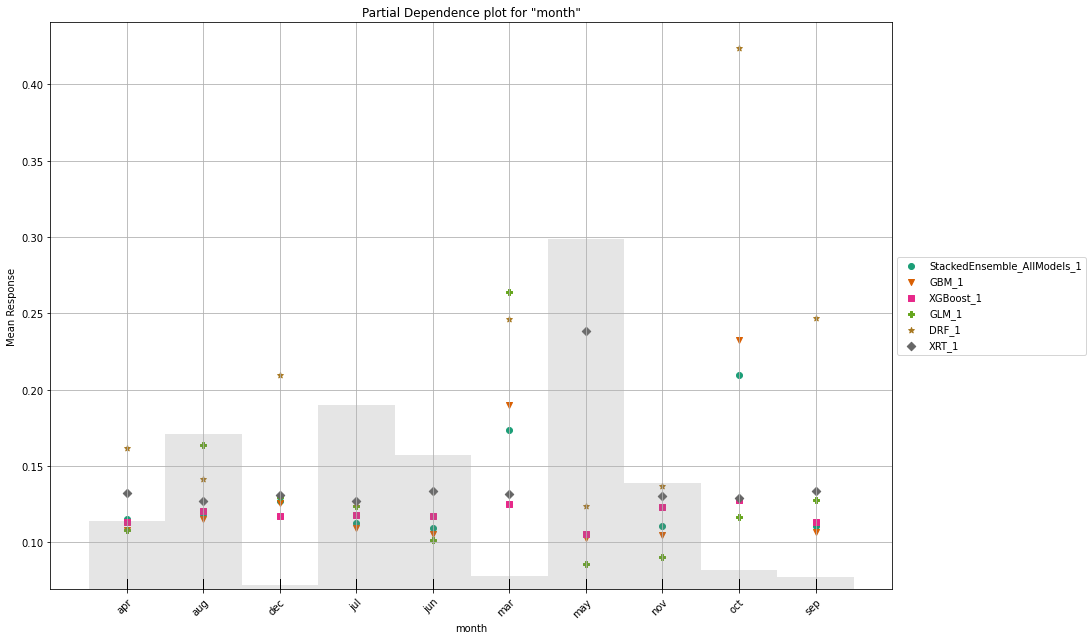

In [35]:
explain = aml.explain(data_test)

In [36]:
corr_data_encoded = pd.get_dummies(corr_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'])
#In this, I have created dummies which is required later.

**Now, lets understand the performance of our best model.**

In [39]:

# Define the target variable
target = 'y'

# Specify the predictor variables
predictors = data.col_names[:-1]

# Run the AutoML process
aml = H2OAutoML(max_models=5, seed=123, max_runtime_secs=3600, sort_metric='AUC')

# Train and validate the models on the training set
aml.train(y=target, x=predictors, training_frame=data_train)

# Evaluate the models on the testing set
performance = aml.leader.model_performance(test_data=data_test)

# Print the performance of the best model
print(performance)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.054811872698382454
RMSE: 0.23411935566796363
LogLoss: 0.16975798550946208
AUC: 0.9513632805055733
AUCPR: 0.663845020547644
Gini: 0.9027265610111466
Null degrees of freedom: 8336
Residual degrees of freedom: 8331
Null deviance: 5835.934999787714
Residual deviance: 2830.5446503847716
AIC: 2842.5446503847716

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31563075669459645
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6856  550    0.0743   (550.0/7406.0)
yes    211   720    0.2266   (211.0/931.0)
Total  7067  1270   0.0913   (761.0/8337.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.315631     0.654248  208
ma

1. AUC score of 0.9475, which means it was really good at telling the difference between positive and negative things.

2. The model correctly guessed that 6616 out of 6779 negative cases were negative and 763 out of 926 positive cases were positive, which means it had an accuracy of 91.5%

3. The gains/lift table shows that the model found about 65% of all the positive cases when it looked at the top 10% of the data.

4. Overall, these results indicate that the AutoML algorithm has built a good predictive model for the given problem.



**Now, we will check the Multicollinearity of the model**

In [49]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = corr_data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["y"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
  
print(vif_data)

                y           VIF
0             age     16.047296
1        duration      2.011044
2        campaign      1.921499
3           pdays     44.413175
4        previous      2.001464
5    emp.var.rate     28.910219
6  cons.price.idx  22561.123124
7   cons.conf.idx    120.086975
8       euribor3m    226.237349
9     nr.employed  26746.634212


In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor



# One-hot encode the categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(corr_data[categorical_cols]).toarray()
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names(categorical_cols))

# Concatenate the encoded columns with the numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data2 = pd.concat([corr_data[numerical_cols], encoded_cols_df], axis=1)


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = data2.columns
vif_data['VIF'] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


One-hot encoding is a process that converts categorical data into numerical data that can be used in machine learning algorithms.

In [42]:

# Remove columns with infinite VIF
vif_data = vif_data.replace([np.inf, -np.inf], np.nan).dropna()

# Print the updated VIF dataframe
print(vif_data)

          Feature         VIF
0             age    1.689922
1        duration    1.244686
2        campaign    1.048521
3           pdays   12.452899
4        previous    5.945827
5    emp.var.rate  239.754653
6  cons.price.idx   89.918824
7   cons.conf.idx    6.822856
8       euribor3m  198.892609
9     nr.employed  200.062029


Here we are getting **pdays as 12.452899,  emp.var.rate  239.754653, cons.price.idx as  89.918824,
  cons.conf.idx  as  6.822856,
euribor3m as 198.892609, nr.employed as  200.060228 which is very high.** 
Hence, we can say that, there is not much multicollinearity in the model except age, duration, campaign as it has low VIF value.





**Lets check the variable significance**

In [43]:
#Using OLS for p value
import statsmodels.api as sm

model = sm.OLS(data2['y_yes'], data2[['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  y_yes   R-squared (uncentered):                   0.249
Model:                            OLS   Adj. R-squared (uncentered):              0.249
Method:                 Least Squares   F-statistic:                              2735.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                        0.00
Time:                        22:46:01   Log-Likelihood:                         -7573.6
No. Observations:               41188   AIC:                                  1.516e+04
Df Residuals:                   41183   BIC:                                  1.520e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
emp.var.rate            -0.0170      0.004     -4.317      0.000      -0.025      -0.009
euribor3m               -0.0337      0.004     -9.141      0.000      -0.041      -0.027
nr.employed           3.289e-05   2.63e-06     12.500      0.000    2.77e-05     3.8e-05
poutcome_nonexistent     0.0579      0.005     11.129      0.000       0.048       0.068
poutcome_success         0.4839      0.009     53.457      0.000       0.466       0.502
==============================================================================
Omnibus:                    17100.950   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63479.545
Skew:                           2.137   Prob(JB):                         0.00
Kurtosis:                       7.327   Cond. No.                     3.38e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared (R²) and p-values** are two important statistics used to evaluate the strength and significance of the relationship between a dependent variable and one or more independent variables in a regression analysis.


The uncentered **R-squared** value is **0.249**. This means that the independent variables included in the model explain 24.9% of the variation in the dependent variable.

**P-value is 0**. This means that the relationship is considered statistically significant.

**REGULARIZATION** 



**Regularization** is a common technique used to reduce the impact of multicollinearity in regression models. The most popular forms of regularization are L1 regularization (Lasso) and L2 regularization (Ridge). These methods add a penalty term to the loss function of the regression model, which helps to constrain the model's coefficients and reduce their dependence on each other.

L1 regularization, in particular, can be useful for feature selection as it shrinks some of the coefficients to zero, effectively removing the corresponding features from the model.

**Lets try Ridge regularization here**


In [52]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

bank_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
bank_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
bank_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
bank_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [86]:
bank_glm_regularization_ridge.train(x=X, y=y_numeric, training_frame=data_train)


H2OResponseError: ignored

In [87]:
lambda_search = bank_glm_regularization_lamba_search.train(
    x=X, y=y_numeric, training_frame=data_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [55]:
lambda_search


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677623446965_2615


GLM Model: summary
    family    link    regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 7.092E-5 )  nlambda = 100, lambda.max = 0.2549, lambda.min = 7.092E-5, lambda.1se = -1.0  63                            52                             128                     py_4_sid_ae2c

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.062401132913961266
RMSE: 0.24980218756840636
LogLoss: 0.20817902133969246
AUC: 0.935699233912676
AUCPR: 0.6026245148521586
Gini: 0.8713984678253519
Null degrees of freedom: 32850
Residual degrees of freedom: 32798
Null deviance: 23162.814512372024
Residual deviance: 13677.778060060476
AIC: 13783.778060060476

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2418484849999609
       no     yes    Error    Rate
-----  -----  -----  -------  ----------------
no     26991  2151   0.0738   (2151.0/29142.0)
yes    1071   2638   0.2888   (1071.0/3709.0)
Total  28062  4789   0.0981   (3222.0/32851.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.241848     0.620852  229
max f2                       0.106221     0.732095  295
max f0point5                 0.395857     0.61058   169
max accuracy                 0.395857     0.912514  169
max precision                0.852708     0.749585  37
max recall                   0.00472795   1         396
max specificity              0.999041     0.999211  0
max absolute_mcc             0.226186     0.57172   236
max min_per_class_accuracy   0.125252     0.862497  284
max mean_per_class_accuracy  0.0836412    0.872869  310
max tns                      0.999041     29119     0
max fns                      0.999041     3682      0
max fps                      0.00229179   29142     399
max tps                      0.00472795   3709      396
max tnr                      0.999041     0.999211  0
max fnr                      0.999041     0.99272   0
max fpr                      0.00229179   1         399
max tpr                      0.00472795   1         396

Gains/Lift Table: Avg response rate: 11.29 %, avg score: 11.29 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100149                   0.925457           6.48803     6.48803            0.732523         0.969395    0.732523                    0.969395            0.0649771       0.0649771                  548.803   548.803            0.0619574
2        0.0200298                   0.835201           6.62264     6.55533            0.74772          0.87936     0.740122                    0.924377            0.0663252       0.131302                   562.264   555.533            0.125434
3        0.0300143                   0.764286           6.12976     6.41377            0.692073         0.800111    0.724138                    0.883039            0.0612025       0.19

In [57]:
bank_glm.train(x=X, y=y_numeric, training_frame=data_train)

H2OResponseError: ignored

In [58]:
#extracting the coeffecients table from GLM Model
coeff_table = bank_glm._model_json["output"]["coefficients_table"]

TypeError: ignored

In [59]:
# Z-Value and P-Value showing the significance of each attributes.
coeff_table.as_data_frame()  

NameError: ignored


**"Performing a random grid search to tune the hyperparameters of a GBM model."**




**Hyperparameter tuning** aims to discover the optimal hyperparameter settings that lead to the highest performance on the test data while avoiding overfitting on the training data. It is a critical stage in the machine learning workflow since the selection of hyperparameters can greatly influence the accuracy and ability to generalize of a machine learning model.

In [60]:
#train test and split
train, validate, test = np.split(
    corr_data.sample(frac=1, random_state=42), [int(0.6 * len(data)), int(0.8 * len(data))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


The code above is performing a train-validation-test split on a pandas DataFrame named corr_data.

In [61]:
import itertools

learn_rate = [i * 0.01 for i in range(1, 11)]
max_depth = list(range(2, 11))
sample_rate = [i * 0.1 for i in range(5, 11)]
col_sample_rate = [i * 0.1 for i in range(1, 11)]
# the product function from the itertools module is used to compute the Cartesian product of all the hyperparameter values.
# This results in a list of tuples, where each tuple contains a unique combination of the hyperparameter values.

gbm_parameters = list(itertools.product(learn_rate, max_depth, sample_rate, col_sample_rate))

# Convert the list of tuples to a dictionary with keys for each hyperparameter
gbm_parameters = {
    "learn_rate": [params[0] for params in gbm_parameters],
    "max_depth": [params[1] for params in gbm_parameters],
    "sample_rate": [params[2] for params in gbm_parameters],
    "col_sample_rate": [params[3] for params in gbm_parameters],
}


In the above code, I tried to use the **itertools.product function** instead of a dictionary comprehension.
It is a bit different from the given notebooks as none of them used itertools.product for the key and values of hyperparameter.

In [65]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

 search criteria defines a random search approach that trains up to 30 GBM models by randomly selecting hyperparameters from the hyperparameter grid defined in gbm_parameters. The purpose of this approach is to find the optimal set of hyperparameters that result in the highest performance on a validation set, with the goal of building a high-performing GBM model.

In [68]:
from h2o.grid import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm = H2OGradientBoostingEstimator()
gbm_grid2 = H2OGridSearch(gbm, hyper_params=gbm_parameters, grid_id="gbm_grid2", search_criteria=search_criteria)


In [69]:
gbm_grid2.train(
    x=X,
    y=y_numeric,
    training_frame=train,
    validation_frame=validate,
)



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.5,0.08,7.0,1.0,gbm_grid2_model_42,0.1703705
,0.9,0.1,7.0,0.9,gbm_grid2_model_24,0.1723032
,0.4,0.07,6.0,0.9,gbm_grid2_model_37,0.1726851
,0.6000000,0.07,7.0,0.7000000,gbm_grid2_model_28,0.1733353
,0.3000000,0.08,6.0,0.7000000,gbm_grid2_model_5,0.1741192
,1.0,0.09,6.0,0.5,gbm_grid2_model_32,0.1746006
,0.5,0.09,5.0,0.5,gbm_grid2_model_33,0.1746853
,0.8,0.08,9.0,0.9,gbm_grid2_model_39,0.1747220
,0.7000000,0.08,4.0,1.0,gbm_grid2_model_6,0.1750418
,0.8,0.1,8.0,0.8,gbm_grid2_model_8,0.1750788


**The output shows a summary of the search results, with the models ordered by increasing logloss. The table shows the values of the hyperparameters for each model, along with the model ID and the logloss score. The best performing model is the one with the lowest logloss, which in this case is gbm_grid2_model_42. This model has a col_sample_rate of 0.5, learn_rate of 0.08, max_depth of 7, and sample_rate of 1.0.**

In [91]:
#access information about best model
gbm_grid2performance = gbm_grid2.get_grid()

print(gbm_grid2performance)

Hyper-Parameter Search Summary: ordered by increasing logloss
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           logloss
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.5                  0.08          7.0          1.0                 gbm_grid2_model_42  0.17037053413515685
     0.9                  0.1           7.0          0.9                 gbm_grid2_model_24  0.17230323555500282
     0.4                  0.07          6.0          0.9                 gbm_grid2_model_37  0.17268512447004375
     0.6000000000000001   0.07          7.0          0.7000000000000001  gbm_grid2_model_28  0.17333525118547344
     0.30000000000000004  0.08          6.0          0.7000000000000001  gbm_grid2_model_5   0.1741191856053401
     1.0                  0.09          6.0          0.5                 gbm_grid2_model_32  0.17460059813172982
     0.5                  0.09          5.0    

In [95]:
models = gbm_grid2performance.models
list_hyperparameters = []

for i in range(30):
    model = models[i]
    hyperparameters = model.actual_params
    performance_metrics = model.model_performance(validate)
    logloss = performance_metrics['logloss']
    hyperparameters['logloss'] = logloss
    list_hyperparameters.append(hyperparameters)
    print("Hyperparameters:", hyperparameters)


Hyperparameters: {'model_id': 'gbm_grid2_model_42', 'training_frame': 'Key_Frame__upload_81d3ecb13f1af3d3a551897b6ffa4b52.hex', 'validation_frame': 'Key_Frame__upload_baa6390775c0ec3ff1ef9e8e12fe4ad1.hex', 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'score_each_iteration': False, 'score_tree_interval': 0, 'fold_assignment': None, 'fold_column': None, 'response_column': 'y', 'ignored_columns': None, 'ignore_const_cols': True, 'offset_column': None, 'weights_column': None, 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'ntrees': 50, 'max_depth': 7, 'min_rows': 10.0, 'nbins': 20, 'nbins_top_level': 1024, 'nbins_cats': 1024, 'r2_stopping': 1.7976931348623157e+308, 'stopping_rounds': 0, 'stopping_metric': None, 'stopping_tolerance': 0.001, 'max_runtime_secs': 0.0, 'seed': 33, 'build_tree_one_node': False, 'learn_rate': 

In [101]:
models = gbm_grid2performance.models
list_logloss = []

for i in range(30):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    logloss = performance_metrics['logloss']
    list_logloss.append(logloss)
    
for i in range(30):
    list_hyperparameters[i]["logloss"] = list_logloss[i]


In [102]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)


In [108]:
gbm_grid2performance = gbm_grid2.get_grid()
models = gbm_grid2performance.models

for model in models:
    performance_metrics = model.model_performance(validate)
    log_loss = performance_metrics.logloss()
    print(f"Model {model.model_id}: log loss = {log_loss}")


Model gbm_grid2_model_42: log loss = 0.17037053413515685
Model gbm_grid2_model_24: log loss = 0.17230323555500282
Model gbm_grid2_model_37: log loss = 0.17268512447004375
Model gbm_grid2_model_28: log loss = 0.17333525118547344
Model gbm_grid2_model_5: log loss = 0.1741191856053401
Model gbm_grid2_model_32: log loss = 0.17460059813172982
Model gbm_grid2_model_33: log loss = 0.17468527151015933
Model gbm_grid2_model_39: log loss = 0.17472204022711652
Model gbm_grid2_model_6: log loss = 0.17504177377005092
Model gbm_grid2_model_8: log loss = 0.1750787747589126
Model gbm_grid2_model_7: log loss = 0.17567389964978072
Model gbm_grid2_model_19: log loss = 0.17609595354659335
Model gbm_grid2_model_22: log loss = 0.17616405406872812
Model gbm_grid2_model_38: log loss = 0.1764208273772497
Model gbm_grid2_model_20: log loss = 0.17831358651422083
Model gbm_grid2_model_3: log loss = 0.17878649664067467
Model gbm_grid2_model_43: log loss = 0.18004707404044248
Model gbm_grid2_model_4: log loss = 0.1

In [105]:
col_sample_rate_values = gbm_parameters['col_sample_rate']
print("col_sample_rate values:", col_sample_rate_values)

learn_rate_values = gbm_parameters['learn_rate']
print("learn_rate values:", learn_rate_values)

max_depth_values = gbm_parameters['max_depth']
print("max_depth values:", max_depth_values)

sample_rate_values = gbm_parameters['sample_rate']
print("sample_rate values:", sample_rate_values)



col_sample_rate values: [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.300

In the code I provided below, x_vars and y_vars are set to the same list of hyperparameters (['col_sample_rate', 'learn_rate', 'max_depth', 'sample_rate']). 
This is because I want to create a scatter plot matrix where each hyperparameter is plotted against every other hyperparameter, including itself.

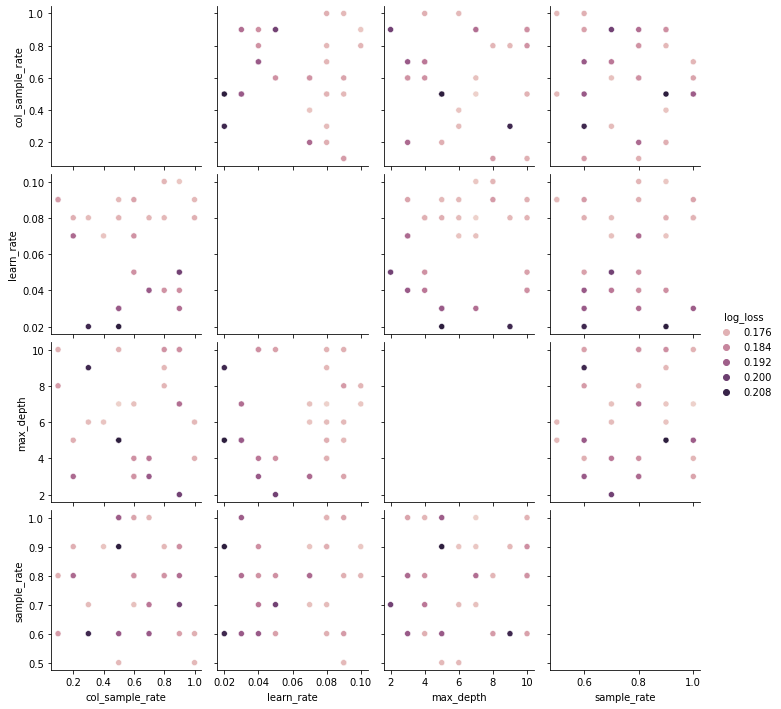

In [110]:

df = pd.DataFrame(list_hyperparameters)
df['log_loss'] = list_logloss

sns.pairplot(df, x_vars=['col_sample_rate', 'learn_rate', 'max_depth', 'sample_rate'], y_vars=['col_sample_rate', 'learn_rate', 'max_depth', 'sample_rate'], hue='log_loss', height=2.5)


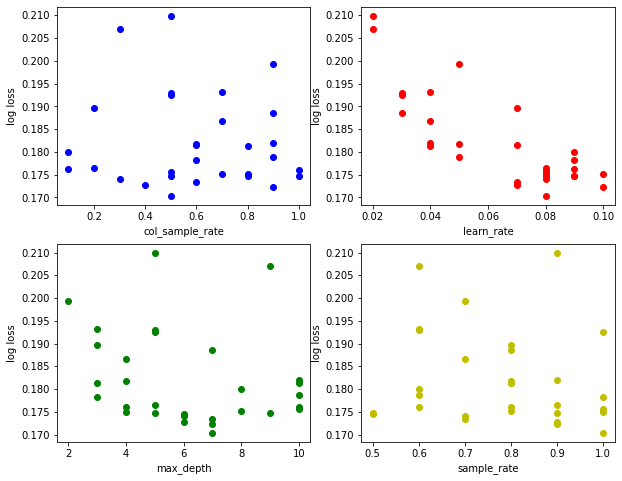

In [113]:

import matplotlib.pyplot as plt

# Extract hyperparameters and log loss from the list of hyperparameters
col_sample_rates = [hyperparameters['col_sample_rate'] for hyperparameters in list_hyperparameters]
learn_rates = [hyperparameters['learn_rate'] for hyperparameters in list_hyperparameters]
max_depths = [hyperparameters['max_depth'] for hyperparameters in list_hyperparameters]
sample_rates = [hyperparameters['sample_rate'] for hyperparameters in list_hyperparameters]
log_losses = [hyperparameters['logloss'] for hyperparameters in list_hyperparameters]

# Create subplots for each hyperparameter
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(col_sample_rates, log_losses, 'bo')
axs[0, 0].set_xlabel('col_sample_rate')
axs[0, 0].set_ylabel('log loss')
axs[0, 1].plot(learn_rates, log_losses, 'ro')
axs[0, 1].set_xlabel('learn_rate')
axs[0, 1].set_ylabel('log loss')
axs[1, 0].plot(max_depths, log_losses, 'go')
axs[1, 0].set_xlabel('max_depth')
axs[1, 0].set_ylabel('log loss')
axs[1, 1].plot(sample_rates, log_losses, 'yo')
axs[1, 1].set_xlabel('sample_rate')
axs[1, 1].set_ylabel('log loss')
plt.show()


**To visualize the hyperparameters in 3D I will import Axes3D**

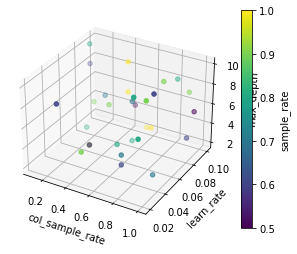

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract hyperparameters and logloss from the list of hyperparameters
col_sample_rates = [hyperparameters['col_sample_rate'] for hyperparameters in list_hyperparameters]
learn_rates = [hyperparameters['learn_rate'] for hyperparameters in list_hyperparameters]
max_depths = [hyperparameters['max_depth'] for hyperparameters in list_hyperparameters]
sample_rates = [hyperparameters['sample_rate'] for hyperparameters in list_hyperparameters]
log_losses = [hyperparameters['logloss'] for hyperparameters in list_hyperparameters]

# Create a 3D scatter plot with color-coded markers for the value of sample_rate
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(col_sample_rates, learn_rates, max_depths, c=sample_rates, cmap='viridis')
ax.set_xlabel('col_sample_rate')
ax.set_ylabel('learn_rate')
ax.set_zlabel('max_depth')
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('sample_rate')
plt.show()


### **Observations**
In the process of hyperparameter tuning , a grid search was performed over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. A total of 30 combinations of hyperparameters were tested, and for each combination, the logloss was calculated as the evaluation metric.


The best performing model has a logloss of 0.17037053413515685 and the worst performing model has a logloss of 0.2858137078080479.

we can say that the best-performing models have a lower log loss, while the worst-performing models have a higher log loss.

 This means that the models with log losses closer to 0.17 are performing better than the models with log losses closer to 0.28.

The model with col_sample_rate = 0.5, learn_rate = 0.08, max_depth = 7, sample_rate = 1, and model_id = gbm_grid2_model_42 has the lowest log loss of all the models considered.


The findings indicate that the performance of the model can be greatly influenced by the combination of col_sample_rate, learn_rate, max_depth, and sample_rate, and that making adjustments to these hyperparameters can result in noteworthy improvements in model performance.









# **Answer the following questions for all of the models:**

## **1.  Is the relationship significant?**
### Ans. Yes, the p value for 'emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success is 0 which is lesser than 0.05 so it is a significant feature.
### The relationship is significant when the p value for the predictor variables is less than 0.05,but if it is higher than 0.05 the result is non-significant. From the OLS method, the above mentioned variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target(y). Hence for the chosen dataset it can be concluded that the relationship is significant.

##2. **Are any model assumptions violated?**
Ans. The presence of striped lines in the residual plot is a result of the response variable being an integer rather than a continuous value. However, it can be noted that there is no indication of heteroscedasticity in the residual plot, indicating that this assumption has not been violated.



In [ ]:
# #creating a drop list to drop the unnesccesary coulms from the dataset
# drop_list = ['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid',
#              'job_management','job_retired','job_self-employed','job_services',
#              'job_student','month_may','month_nov','month_oct','month_sep','contact_cellular'
# ,'contact_telephone','day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue',
# 'day_of_week_wed','marital_divorced','marital_married','marital_single','marital_unknown','default_unknown',
# 'housing_unknown','loan_unknown','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes']
# drop_data = corr_data_encoded[drop_list]
# corr_data_encoded.drop(drop_list,axis=1,inplace=True)

In [ ]:
# #Since we are getting an error suggesting nans or infs or out of range nums exist.
# #since we know no nulls are present we are trying to remove any infs if present.
# corr_data_encoded.replace([np.inf, -np.inf], np.nan)



In [ ]:
#  corr_data_encoded.isna().sum()

In [ ]:
# corr_data_encoded

The **most important** feature for predicting the target variable is **emp.var.rate** because it has the largest absolute value of the coefficient among all the features. 

The **negative sign** of the coefficient indicates that as the value of **emp.var.rate increases** (which means the employment variation rate decreases), the target variable is **expected to decrease.**



In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Label encode the target variable y_train
# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)

# # Create a Ridge regression model with alpha = 0.1
# ridge = Ridge(alpha=0.1)

# # Fit the model to the training data
# ridge.fit(X_train_scaled, y_train_encoded)

# # Print the coefficients of the model
# print(ridge.coef_)


In [ ]:
# from sklearn.metrics import mean_squared_error

# # Predict the target variable for the test data using the fitted Ridge model
# y_test_pred = ridge.predict(X_test_scaled)

# # Convert the encoded target variable back to its original form
# y_test = le.inverse_transform(y_test_encoded)

# # Calculate the mean squared error of the predictions
# mse = mean_squared_error(y_test, y_test_pred)

# # Print the mean squared error
# print("Mean squared error:", mse)


In [ ]:

# # Get Column names
# Column_names = corr_data_encoded.drop('y', axis=1).columns

# # Create DataFrame of coefficients with Column names
# coef_df = pd.DataFrame(zip(Column_names, ridge.coef_), columns=['Column_name', 'Coefficient'])

# # Print DataFrame sorted by absolute value of coefficient
# print(coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index))


In [ ]:
# # Convert 'age' column to integer type
# data["job"] = data["job"].asnumeric()
# data["marital"] = data["marital"].asnumeric()
# data["education"] = data["education"].asnumeric()
# data["default"] = data["default"].asnumeric()
# data["housing"] = data["housing"].asnumeric()
# data["loan"] = data["loan"].asnumeric()
# data["emp.var.rate"] = data["emp.var.rate"].asnumeric()
# data["y"] = data["y"].asnumeric()



# # View the data to confirm the data type conversion
# print(data.types)


The above output is a bit vague. To understand it clearly we will drop some unwanted columns and missing values. Then, we will try to find the output in a clear way where the column names and the values will be apparent.